In [1]:
%reload_ext mocodo
from mocodo.magic import mocodo
import mcd_mocodo as mcd

Mocodo 4.2.6 loaded.


In [2]:
def generer_mcd(domaine:str, ga:bool=False,seed:float=1):
    """
    Genère un graphe MCD à partir d'un domaine exprimé en MCD mocodo

    :param domaine: Le domaine exprimé en MCD mocodo
    :type domaine: str
    :param ga: Utiliser l'algorithme génétique pour arranger les entités, par défaut False
    :type ga: bool, optional
    :param seed: La graine pour le réarangement des entités, par défaut 1
    :type seed: float, optional

    """
    return mocodo(f"""
    %mocodo --colors ocean -t arrange{":algo=ga" if ga else ""} --seed {seed} --detect_overlaps --select mcd
    {domaine}
    """)


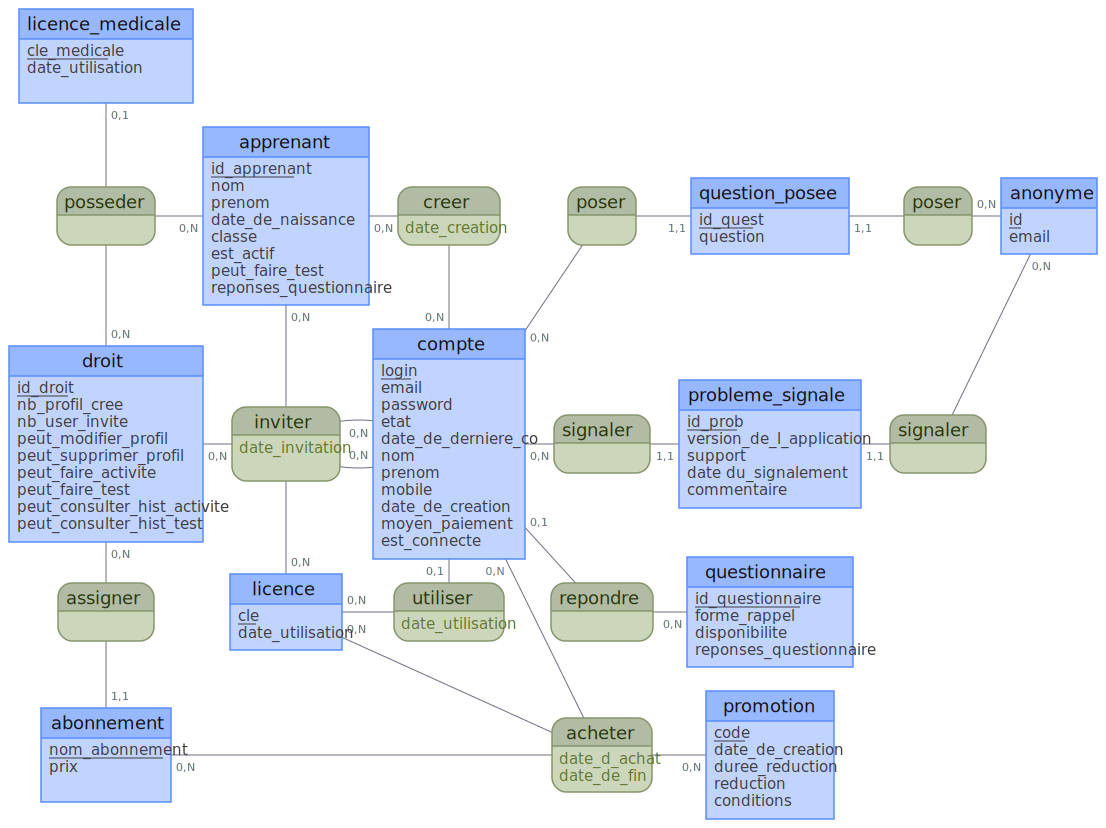

In [3]:
generer_mcd(mcd.auth,seed=4)

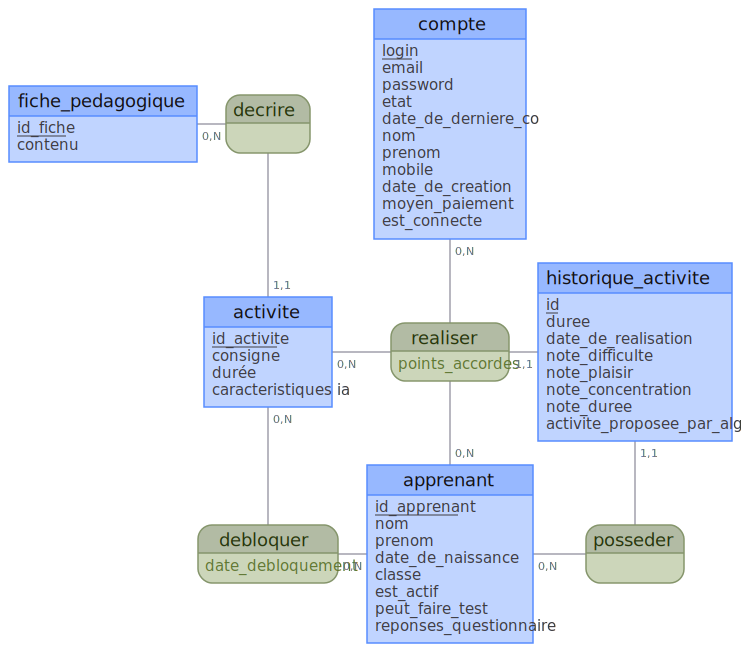

In [4]:
generer_mcd(mcd.activites,seed=2)

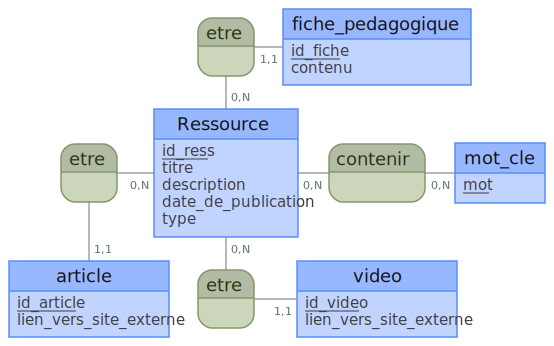

In [5]:
generer_mcd(mcd.ressources,seed=2)

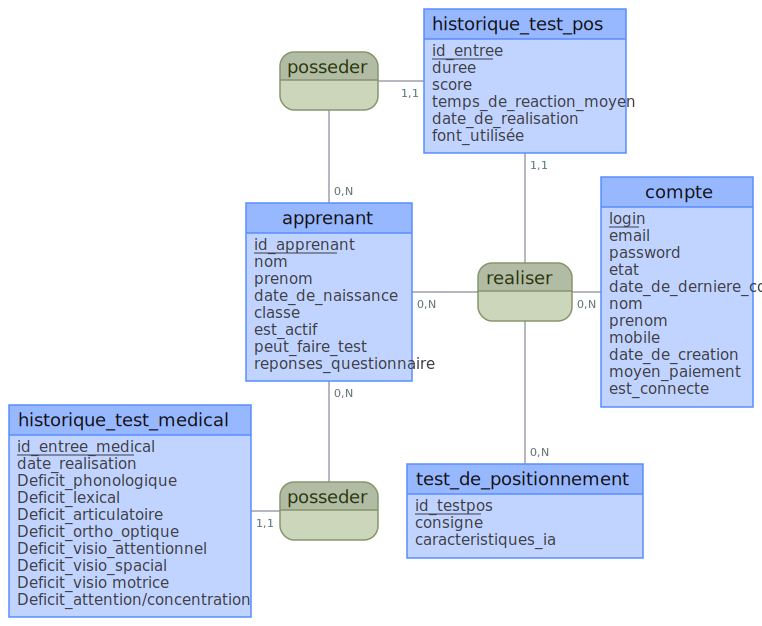

In [6]:
generer_mcd(mcd.test,seed=3)

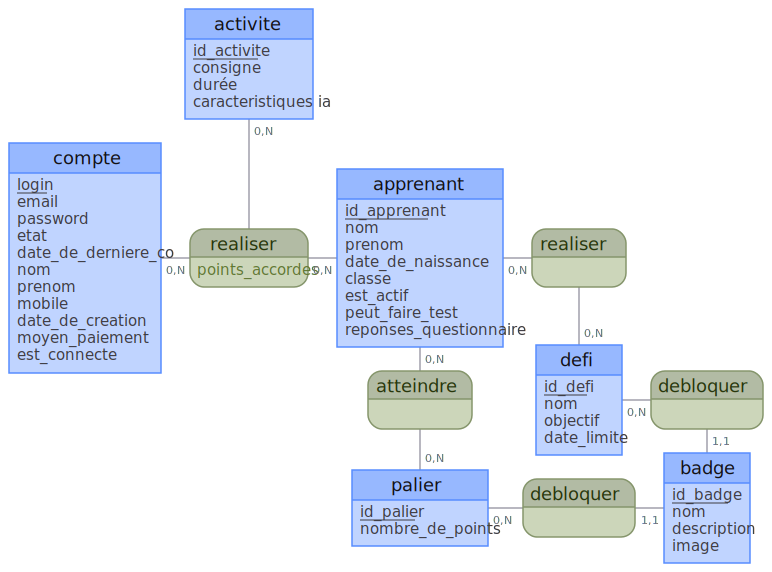

In [7]:
generer_mcd(mcd.recompenses,seed=3)

In [8]:
def generer_mmd(domaine:str):
    """
    Genère un graphe Mermaid Crowfoot notation à partir d'un domaine exprimé en MCD mocodo.
    
    :param domaine: Le domaine exprimé en MCD mocodo
    :type domaine: str
    """

    return mocodo(f"""
    %mocodo --colors ocean -t crow:mmd
    {domaine}
    """)
    

In [9]:
generer_mmd(mcd.texte_complet)


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
mocodo_notebook/sandbox_erd_crow.mmd
</tt>
</span>
</div>


```mmd
erDiagram
  licence {
    TEXT cle PK
    DATE date_utilisation
  }
  licence_medicale {
    TEXT cle_medicale PK
    DATE date_utilisation
    TYPE 
  }
  promotion {
    TEXT code PK
    DATE date_de_creation
    NUMBER duree_reduction
    NUMBER reduction
    TEXT conditions
  }
  abonnement {
    TEXT nom_abonnement PK
    NUMBER prix
    TYPE 
  }
  droit {
    TEXT id_droit PK
    NUMBER nb_profil_cree
    NUMBER nb_user_invite
    BOOL peut_modifier_profil
    BOOL peut_supprimer_profil
    BOOL peut_faire_activite
    BOOL peut_faire_test
    BOOL peut_consulter_hist_activite
    BOOL peut_consulter_hist_test
  }
  questionnaire {
    TEXT id_questionnaire PK
    TEXT forme_rappel
    TODO disponibilite
    TODO reponses_questionnaire
  }
  probleme_signale {
    TEXT id_prob PK
    TEXT version_de_l_application
    TEXT support
    DATE date_du_signalement
    TODO commentaire
  }
  question_posee {
    TEXT id_quest PK
    TEXT question
  }
  anonyme {
    TEXT id PK
    TEXT email
  }
  inviter {
    DATE date_invitation PK
    TYPE 
  }
  creer {
    DATE date_creation PK
  }
  acheter {
    DATE date_d_achat PK
    DATE date_de_fin
  }
  historique_activite {
    TEXT id PK
    NUMBER duree
    DATE date_de_realisation
    NUMBER note_difficulte
    NUMBER note_plaisir
    NUMBER note_concentration
    NUMBER note_duree
    BOOL activite_proposee_par_algo
    NUMBER points_accordes
  }
  debloquer {
    DATE date_debloquement PK
  }
  palier {
    TEXT id_palier PK
    TEXT nombre_de_points
  }
  defi {
    TEXT id_defi PK
    TEXT nom
    TEXT objectif
    DATE date_limite
  }
  badge {
    NUMBER id_badge PK
    TEXT nom
    TEXT description
    BLOB image
  }
  mot_cle {
    TEXT mot PK
  }
  Ressource {
    TEXT id_ress PK
    TEXT titre
    TEXT description
    DATE date_de_publication
    TEXT type
  }
  video {
    TEXT id_video PK
    TEXT lien_vers_site_externe
  }
  article {
    TEXT id_article PK
    TEXT lien_vers_site_externe
  }
  test_de_positionnement {
    TEXT id_testpos PK
    TEXT consigne
    TEST caracteristiques_ia
  }
  historique_test_pos {
    TEST id_entree PK
    NUMBER duree
    NUMBER score
    NUMBER temps_de_reaction_moyen
    DATE date_de_realisation
    TEXT font_utilisee
  }
  historique_test_medical {
    TEXT id_entree_medical PK
    DATE date_realisation
    BOOL Deficit_phonologique
    BOOL Deficit_lexical
    BOOL Deficit_articulatoire
    BOOL Deficit_ortho_optique
    TEXT Deficit_visio_attentionnel
    BOOL Deficit_visio_spacial
    BOOL Deficit_visio_motrice
    BOOL Deficit_attention_concentration
  }
  apprenant {
    TEXT id_apprenant PK
    TEXT nom
    TEXT prenom
    DATE date_de_naissance
    TEXT classe
    BOOL est_actif
    BOOL peut_faire_test
    TODO reponses_questionnaire
  }
  compte {
    TEXT login PK
    TEXT email
    TEXT password
    TEXT etat
    DATE date_de_derniere_co
    TEXT nom
    TEXT prenom
    NUMBER mobile
    DATE date_de_creation
    TODO moyen_paiement
    BOOL est_connecte
  }
  fiche_pedagogique {
    TYPE id_fiche PK
    TYPE contenu
  }
  activite {
    TYPE id_activite PK
    TYPE consigne
    TYPE duree
    TYPE caracteristiques_ia
  }
  licence_medicale }o--o| apprenant: posseder2
  licence_medicale }o--o| droit: posseder2
  inviter }o..|| compte: DF
  inviter }o..|| compte: DF
  inviter }o..|| apprenant: DF
  inviter }o..|| droit: DF
  inviter }o..|| licence: DF
  compte }o--o| licence: utiliser
  compte }o--o| questionnaire: repondre
  creer }o..|| compte: DF
  creer }o..|| apprenant: DF
  acheter }o..|| compte: DF
  acheter }o..|| promotion: DF
  acheter }o..|| licence: DF
  acheter }o..|| abonnement: DF
  abonnement }o--|| droit: assigner
  question_posee }o--|| anonyme: poser
  question_posee }o--|| compte: poser
  probleme_signale }o--|| anonyme: signaler
  probleme_signale }o--|| compte: signaler
  historique_activite }o--|| compte: realiser
  historique_activite }o--|| activite: realiser
  historique_activite }o--|| apprenant: realiser
  debloquer }o..|| activite: DF
  debloquer }o..|| apprenant: DF
  historique_activite }o--|| apprenant: posseder
  fiche_pedagogique ||--o{ activite: decrire
  apprenant }o--o{ palier: atteindre
  apprenant }o--o{ defi: realiser
  defi ||--o{ badge: debloquer
  palier ||--o{ badge: debloquer
  mot_cle }o--o{ Ressource: contenir
  Ressource ||--o{ video: etre
  Ressource ||--o{ article: etre
  Ressource ||--o{ fiche_pedagogique: etre
  historique_test_pos }o--|| compte: realiser2
  historique_test_pos }o--|| test_de_positionnement: realiser2
  historique_test_pos }o--|| apprenant: realiser2
  historique_test_pos }o--|| apprenant: posseder
  historique_test_medical }o--|| apprenant: posseder

```

In [ ]:
def generer_types(domaine:str):
    """
    Infère les types des attribut d'un domaine exprimé en MCD mocodo.
    
    :param domaine: Le domaine exprimé en MCD mocodo
    :type domaine: str
    """
    return mocodo(f"""
    %mocodo -t create:types=TODO --select rw
    {domaine}
    """)

def generer_mld(domaine:str):
    """
    Genère un MLD textuel à partir d'un domaine exprimé en MCD mocodo.
    
    :param domaine: Le domaine exprimé en MCD mocodo
    :type domaine: str
    """
    return mocodo(f"""
    %mocodo -t mld
    {domaine}
    """)